# Flight Delays

In [1]:
import pandas as pd
import glob
import os
import requests
import json
import numpy as np

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## Business Understanding

MVP should support:

* [Top 8 US Airlines](https://www.statista.com/statistics/250577/domestic-market-share-of-leading-us-airlines/)
 * American Airlines
 * Delta Air Lines
 * United Airlines
 * Southwest Airlines
 * Alaska Airlines
 * JetBlue Airways
 * Spirit
 * SkyWest
* [Large and medium airport hubs](https://www.faa.gov/airports/planning_capacity/passenger_allcargo_stats/passenger/media/cy20-commercial-service-enplanements.pdf)
 * "The term hub is used by the FAA to identify very busy commercial service airports. Large hubs are the airports that each account for at least one percent of total U.S. passenger enplanements."
 * In 2020 these accounted for 84% of all enplanements


### Airports
| State | Locid | City                  | Airport Name                                           | CY 20 Enplanements |
|-------|-------|-----------------------|--------------------------------------------------------|--------------------|
| GA    | ATL   | Atlanta               | Hartsfield - Jackson Atlanta International             |         20,559,866 |
| TX    | DFW   | Fort Worth            | Dallas-Fort Worth International                        |         18,593,421 |
| CO    | DEN   | Denver                | Denver International                                   |         16,243,216 |
| IL    | ORD   | Chicago               | Chicago O'Hare International                           |         14,606,034 |
| CA    | LAX   | Los Angeles           | Los Angeles International                              |         14,055,777 |
| NC    | CLT   | Charlotte             | Charlotte/Douglas International                        |         12,952,869 |
| NV    | LAS   | Las Vegas             | Harry Reid International                               |         10,584,059 |
| AZ    | PHX   | Phoenix               | Phoenix Sky Harbor International                       |         10,531,436 |
| FL    | MCO   | Orlando               | Orlando International                                  |         10,467,728 |
| WA    | SEA   | Seattle               | Seattle-Tacoma International                           |          9,462,411 |
| FL    | MIA   | Miami                 | Miami International                                    |          8,786,007 |
| TX    | IAH   | Houston               | George Bush Intcntl/Houston                            |          8,682,558 |
| NY    | JFK   | New York              | John F Kennedy International                           |          8,269,819 |
| FL    | FLL   | Fort Lauderdale       | Fort Lauderdale/Hollywood International                |          8,015,744 |
| NJ    | EWR   | Newark                | Newark Liberty International                           |          7,985,474 |
| CA    | SFO   | San Francisco         | San Francisco International                            |          7,745,057 |
| MN    | MSP   | Minneapolis           | Minneapolis-St Paul International/Wold-  Chamberlain   |          7,069,720 |
| MI    | DTW   | Detroit               | Detroit Metro Wayne County                             |          6,822,324 |
| MA    | BOS   | Boston                | General Edward Lawrence Logan   International          |          6,035,452 |
| UT    | SLC   | Salt Lake City        | Salt Lake City International                           |          5,981,032 |
| PA    | PHL   | Philadelphia          | Philadelphia International                             |          5,753,239 |
| MD    | BWI   | Glen Burnie           | Baltimore/Washington International   Thurgood Marshall |          5,451,355 |
| FL    | TPA   | Tampa                 | Tampa International                                    |          4,966,775 |
| CA    | SAN   | San Diego             | San Diego International                                |          4,637,856 |
| IL    | MDW   | Chicago               | Chicago Midway International                           |          4,236,603 |
| NY    | LGA   | New York              | Laguardia                                              |          4,147,116 |
| TN    | BNA   | Nashville             | Nashville International                                |          4,013,995 |
| VA    | IAD   | Dulles                | Washington Dulles International                        |          3,862,658 |
| TX    |   DAL | Dallas                | Dallas Love Field                                      |          3,669,930 |
| VA    | DCA   | Arlington             | Ronald Reagan Washington Ntl                           |          3,573,489 |
| OR    | PDX   | Portland              | Portland International                                 |          3,455,877 |
| TX    | AUS   | Austin                | Austin-Bergstrom International                         |          3,141,505 |
| TX    | HOU   | Houston               | William P Hobby                                        |          3,127,178 |
| HI    | HNL   | Honolulu              | Daniel K Inouye International                          |          3,126,391 |
| MO    | STL   | St. Louis             | St Louis Lambert International                         |          3,041,765 |
| FL    | RSW   | Fort Myers            | Southwest Florida International                        |          2,947,139 |
| CA    | SMF   | Sacramento            | Sacramento International                               |          2,710,342 |
| LA    | MSY   | New Orleans -  Kenner | Louis Armstrong New Orleans   International            |          2,632,606 |
| PR    | SJU   | San Juan              | Luis Munoz Marin International                         |          2,362,851 |
| NC    | RDU   | Raleigh               | Raleigh-Durham International                           |          2,337,496 |
| CA    | SJC   | San Jose              | Norman Y Mineta San Jose International                 |          2,283,186 |
| CA    | OAK   | Oakland               | Metro Oakland International                            |          2,271,294 |
| MO    | MCI   | Kansas City           | Kansas City International                              |          2,167,616 |
| OH    | CLE   | Cleveland             | Cleveland-Hopkins International                        |          1,990,156 |
| IN    | IND   | Indianapolis          | Indianapolis International                             |          1,989,126 |
| TX    | SAT   | San Antonio           | San Antonio International                              |          1,919,958 |
| CA    | SNA   | Santa Ana             | John Wayne/Orange County                               |          1,824,836 |
| PA    | PIT   | Pittsburgh            | Pittsburgh International                               |          1,742,406 |
| KY    | CVG   | Hebron                | Cincinnati/Northern Kentucky   International           |          1,729,395 |
| OH    | CMH   | Columbus              | John Glenn Columbus International                      |          1,577,596 |
| FL    | PBI   | West Palm   Beach     | Palm Beach International                               |          1,518,732 |
| FL    | JAX   | Jacksonville          | Jacksonville International                             |          1,367,501 |
| WI    | MKE   | Milwaukee             | General Mitchell International                         |          1,263,385 |
| CA    | ONT   | Ontario               | Ontario International                                  |          1,237,946 |
| AK    | ANC   | Anchorage             | Ted Stevens Anchorage International                    |          1,157,301 |
| CT    | BDL   | Windsor Locks         | Bradley International                                  |          1,150,033 |
| HI    | OGG   | Kahului               | Kahului                                                |          1,135,141 |
| CA    | BUR   | Burbank               | Bob Hope                                               |          1,056,838 |
| NE    | OMA   | Omaha                 | Eppley Airfield                                        |          1,036,245 |
| TN    | MEM   | Memphis               | Memphis International                                  |          1,015,981 |
| ID    | BOI   | Boise                 | Boise Air Trml/Gowen Field                             |            991,241 |
| NV    | RNO   | Reno                  | Reno/Tahoe International                               |            976,937 |
| SC    | CHS   | Charleston            | Charleston AFB/International                           |            944,660 |
| OK    | OKC   | Oklahoma City         | Will Rogers World                                      |            934,842 |

## Data

In [2]:
# flight_data = glob.glob(os.path.join('data/flights/', "*.csv"))

# df = pd.concat((pd.read_csv(f) for f in flight_data), ignore_index=True)

| Field               | Description                                                                                                                                                         |
|---------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| YEAR                | Year                                                                                                                                                                |
| MONTH               | Month                                                                                                                                                               |
| DAY_OF_WEEK         | Day of Week                                                                                                                                                         |
| FL_DATE             | Flight Date (yyyymmdd)                                                                                                                                              |
| MKT_UNIQUE_CARRIER  | Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2).    |
| MKT_CARRIER_FL_NUM  | Flight Number                                                                                                                                                       |
| OP_UNIQUE_CARRIER   | Flight NumberUnique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2)  |
| ORIGIN              | Origin Airport                                                                                                                                                     |
| ORIGIN_WAC          | Origin Airport, World Area Code                                                                                                                                     |
| DEST                | Destination Airport                                                                                                                                                |
| DEST_WAC            | Destination Airport, World Area Code                                                                                                                                |
| CRS_DEP_TIME        | CRS Departure Time (local time: hhmm)                                                                                                                               |
| DEP_TIME            | Actual Departure Time (local time: hhmm)                                                                                                                            |
| DEP_DELAY_NEW       | Difference in minutes between scheduled and actual departure time. Early departures set to 0.                                                                       |
| TAXI_OUT            | Taxi Out Time, in Minutes                                                                                                                                           |
| TAXI_IN             | Taxi In Time, in Minutes                                                                                                                                            |
| CRS_ARR_TIME        | CRS Arrival Time (local time: hhmm)                                                                                                                                 |
| ARR_TIME            | Actual Arrival Time (local time: hhmm)                                                                                                                              |
| ARR_DELAY_NEW       | Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.                                                                           |
| CARRIER_DELAY       | Carrier Delay, in Minutes                                                                                                                                           |
| WEATHER_DELAY       | Weather Delay, in Minutes                                                                                                                                           |
| NAS_DELAY           | National Air System Delay, in Minutes                                                                                                                               |
| SECURITY_DELAY      | Security Delay, in Minutes                                                                                                                                         |
| LATE_AIRCRAFT_DELAY | Late Aircraft Delay, in Minutes                                                                                                                                    |


In [3]:
# def float_to_time(time):
#     time_str = str(time)
#     digits = len(time_str)
#     if digits < 2:
#         return '00:0' + str(time)
#     if digits == 2:
#         return '00:' + str(time)
#     if digits == 3:
#         return '0' + time_str[:1] + ':' + time_str[1:]
#     if digits == 4:
#         return time_str[:2] + ':' + time_str[2:]
    
# df['FL_DATE'] = df['FL_DATE'].astype('datetime64[ns]')
# df.sort_values('FL_DATE', inplace=True)

# df['prev_airport'] = df.groupby('TAIL_NUM')['ORIGIN'].shift(fill_value=0)
# df['prev_airport_date'] = df.groupby('TAIL_NUM')['FL_DATE'].shift(fill_value=0)
# df['scheduled-takeoff-time'] = df['CRS_DEP_TIME'].apply(float_to_time)
# df['scheduled-takeoff'] =  pd.to_datetime(df['FL_DATE'].astype(str) + ' ' + df['scheduled-takeoff-time'])

In [4]:
# from datetime import datetime, timedelta

# def hour_rounder(t):
#     # Rounds to nearest hour by adding a timedelta hour if minute >= 30
#     return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
#                +timedelta(hours=t.minute//30))

# df['rounded-takeoff'] = df['scheduled-takeoff'].apply(hour_rounder)
# df['rounded-takeoff-minus-one'] = df['rounded-takeoff'] - timedelta(hours=0, minutes=60)
# df['take-off-rounded-hour'] = df['rounded-takeoff'].dt.hour
# df['take-off-rounded-hour-minus-one'] = df['rounded-takeoff-minus-one'].dt.hour
# df['congestion-at-takeoff-key'] = df['ORIGIN'] + df['MONTH'].astype(str) + df['DAY_OF_MONTH'].astype(str) + df['DAY_OF_WEEK'].astype(str) + df['take-off-rounded-hour'].astype(str)
# df['congestion-before-takeoff-key'] = df['ORIGIN'] + df['MONTH'].astype(str) + df['DAY_OF_MONTH'].astype(str) + df['DAY_OF_WEEK'].astype(str) + df['take-off-rounded-hour-minus-one'].astype(str)

In [5]:
# flight_counts_at_takehoff = df.groupby('congestion-at-takeoff-key')['TAIL_NUM'].count()
# flight_counts_at_takehoff = flight_counts_at_takehoff.to_frame()
# flight_counts_at_takehoff.reset_index(inplace=True)

# flight_counts_at_takehoff.rename(columns={'congestion-at-takeoff-key': 'congestion-at-takeoff-key', 'TAIL_NUM': 'count_flights_at_takeoff'}, inplace=True)

# flight_counts_before_takeoff = df.groupby('congestion-before-takeoff-key')['TAIL_NUM'].count()
# flight_counts_before_takeoff = flight_counts_before_takeoff.to_frame()
# flight_counts_before_takeoff.reset_index(inplace=True)

# flight_counts_before_takeoff.rename(columns={'congestion-before-takeoff-key': 'congestion-before-takeoff-key', 'TAIL_NUM': 'count_flights_before'}, inplace=True)

# flight_counts_at_takehoff['avg-flights-at-takeoff'] = flight_counts_at_takehoff['count_flights_at_takeoff'] / 3
# flight_counts_before_takeoff['avg-flights-before-takeoff'] = flight_counts_before_takeoff['count_flights_before'] / 3

# df = df.merge(flight_counts_at_takehoff, on='congestion-at-takeoff-key')
# df = df.merge(flight_counts_before_takeoff, on='congestion-before-takeoff-key')

In [6]:
# filtered_df = df.loc[df['YEAR'] > 2018] 
# filtered_df = filtered_df.loc[filtered_df['prev_airport'] != 0] 

# filtered_df['date_diff'] = filtered_df['FL_DATE'] - filtered_df['prev_airport_date']

It looks like 98% of planes are at another airport within a day of being scheduled for another flight. So it's possible the weather at that previous airport to affect it's ability to arrive on time.

In [7]:
# # Create list of relevant aiports based on business case
# relevant_airports = ['ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'CLT', 'LAS', 'PHX', 
#                      'MCO', 'SEA', 'MIA', 'IAH', 'JFK', 'FLL', 'EWR', 'SFO', 'MSP', 'DTW',
#                      'BOS', 'SLC', 'PHL', 'BWI', 'TPA', 'SAN', 'MDW', 'LGA', 'BNA', 'IAD',
#                      'DAL', 'DCA', 'PDX', 'AUS', 'HOU', 'HNL', 'STL', 'RSW', 'SMF', 'MSY',
#                      'SJU', 'RDU', 'OAK', 'MCI', 'CLE', 'IND', 'SAT', 'SNA', 'PIT', 'CVG',
#                      'CMH', 'PBI', 'JAX', 'MKE', 'ONT', 'ANC', 'BDL', 'OGG', 'OMA', 'MEM',
#                      'BOI', 'RNO', 'CHS', 'OKC']

# # Create list of relevant IATA airline designators based on business case
# relevant_airlines = ['WN', # Southwest
#                      'DL', # Delta
#                      'OO', # SkyWest
#                      'AA', # American Airlines
#                      'UA', # United Airlines
#                      'B6', # JetBlue
#                      'AS', # Alaska Airlines
#                      'NK', # Spirit Airlines
#                     ]

# # Filter Dataframe to include only relevant airlines & airports
# airport_filter = '|'.join(relevant_airports)
# airline_filter = '|'.join(relevant_airlines)

# df_origin_filtered = filtered_df[pd.notna(filtered_df['ORIGIN']) & filtered_df['ORIGIN'].str.contains(airport_filter) & filtered_df['prev_airport'].str.contains(airport_filter)]
# df_carrier_filtered = df_origin_filtered[pd.notna(df_origin_filtered['OP_CARRIER']) & 
#                                          df_origin_filtered['OP_CARRIER'].str.contains(airline_filter)]

### What causes delays?
Here is a list of delay causes since 2018 as reported by the [Bureau of Transportation Statistics (BTS)](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations).

| Year    | Air Carrier Delay (%) | Aircraft Arriving Late (%) | National Aviation System Delay (%) | Security Delay (%) | Extreme Weather (%) |
|---------|:---------------------:|:--------------------------:|:----------------------------------:|:------------------:|:-------------------:|
| 2018    |           30          |             40             |                 25                 |        0.10        |          6          |
| 2019    |           31          |             40             |                 24                 |        0.10        |          6          |
| 2020    |           41          |             30             |                 22                 |        0.20        |          7          |
| Average |           34          |             37             |                 23                 |        0.13        |          6          |

The breakout provided by the Bureau of Transportation Statistics is a little misleading when it comes to delays caused by weather. They explain it:

"There is another category of weather within the [National Aviation System Delay] category. This type of weather slows the operations of the system but does not prevent flying. Delays or cancellations coded "NAS" are the type of weather delays that could be reduced with corrective action by the airports or the Federal Aviation Administration. During 2020, 45.8% of NAS delays were due to weather."

"A true picture of total weather-related delays requires several steps. First, the extreme weather delays must be combined with the NAS weather category. Second, a calculation must be made to determine the weather-related delays included in the "late-arriving aircraft" category. Airlines do not report the causes of the late-arriving aircraft but an allocation can be made using the proportion of weather related-delays and total flights in the other categories."

| Year    | Weather Related Delays |
|---------|------------------------|
| 2018    |           38           |
| 2019    |           39           |
| 2020    |           29           |
| 2021    |           27           |
| Average |           33           |

Given the importance of weather as a delay factor, we will work to bring in weather data into our analysis.

### Bringing in Weather Data

One of the best sources of data is the National Oceanic and Atmospheric Administration (NOAA). It has weather stations all over the United States which collect weather data. This data can then be downloaded through their API.

We'll work to link NOAA weather data at the scheduled departure time for each flight.

We will be looking for the following weather stats:
* Temperature
* Precipitation
* Surface wind
* Ceiling & Visibility
 * Ceiling: The height above the earth's surface of the lowest layer reported as broken or overcast, or as the vertical visibility into an indefinite ceiling
 * Visibility: the vertical distance that an observer or some remote sensing device can see into a cloud
 
Data from NOAA by weather station is available [here](https://www.ncei.noaa.gov/data/normals-hourly/2006-2020/access/).

|                                         Airport Name |  Station ID |
|-----------------------------------------------------:|------------:|
|           Hartsfield - Jackson Atlanta International | USW00013874 |
|                      Dallas-Fort Worth International | USW00003927 |
|                                 Denver International | USW00003017 |
|                         Chicago O'Hare International | USW00094846 |
|                            Los Angeles International | USW00023174 |
|                      Charlotte/Douglas International | USW00013881 |
|                             Harry Reid International | USW00023169 |
|                     Phoenix Sky Harbor International | USW00023183 |
|                                Orlando International | USW00012815 |
|                         Seattle-Tacoma International | USW00024233 |
|                                  Miami International | USW00012839 |
|                          George Bush Intcntl/Houston | USW00012960 |
|                         John F Kennedy International | USW00094789 |
|              Fort Lauderdale/Hollywood International | USW00012849 |
|                         Newark Liberty International | USW00014734 |
|                          San Francisco International | USW00023234 |
|  Minneapolis-St Paul International/Wold- Chamberlain | USW00014922 |
|                           Detroit Metro Wayne County | USW00094847 |
|          General Edward Lawrence Logan International | USW00014739 |
|                         Salt Lake City International | USW00024127 |
|                           Philadelphia International | USW00013739 |
| Baltimore/Washington International Thurgood Marshall | USW00093721 |
|                                  Tampa International | USW00012842 |
|                              San Diego International | USW00023188 |
|                         Chicago Midway International | USW00014819 |
|                                            Laguardia | USW00014732 |
|                              Nashville International | USW00013897 |
|                      Washington Dulles International | USW00093738 |
|                                    Dallas Love Field | USW00013960 |
|                         Ronald Reagan Washington Ntl | USW00013743 |
|                               Portland International | USW00024229 |
|                       Austin-Bergstrom International | USW00013904 |
|                                      William P Hobby | USW00012918 |
|                        Daniel K Inouye International | USW00022521 |
|                       St Louis Lambert International | USW00013994 |
|                      Southwest Florida International | USW00012835 |
|                             Sacramento International | USW00023232 |
|            Louis Armstrong New Orleans International | USW00012916 |
|                       Luis Munoz Marin International | USW00022010 |
|                         Raleigh-Durham International | USW00013722 |
|                          Metro Oakland International | USW00023230 |
|                            Kansas City International | USW00003947 |
|                      Cleveland-Hopkins International | USW00014820 |
|                           Indianapolis International | USW00093819 |
|                            San Antonio International | USW00012921 |
|                             John Wayne/Orange County | USW00093184 |
|                             Pittsburgh International | USW00094823 |
|           Cincinnati/Northern Kentucky International | USW00093814 |
|                    John Glenn Columbus International | USW00014821 |
|                             Palm Beach International | USW00012844 |
|                           Jacksonville International | USW00013889 |
|                       General Mitchell International | USW00014839 |
|                                Ontario International | USW00003102 |
|                  Ted Stevens Anchorage International | USW00026451 |
|                                Bradley International | USW00014740 |
|                                              Kahului | USW00022516 |
|                                      Eppley Airfield | USW00014942 |
|                                Memphis International | USW00013893 |
|                           Boise Air Trml/Gowen Field | USW00024131 |
|                             Reno/Tahoe International | USW00023185 |
|                         Charleston AFB/International | USW00013880 |
|                                    Will Rogers World | USW00013967 |

In [8]:
# def get_keys(path):
#     with open(path) as f:
#         return json.load(f)
    
# keys = get_keys("C:/Users/Robert/.secret/noaa_api.json")

# api_key = keys['api_key']

# import time

# weather_stations = {}

# for i in station_list:
#     weather_stations[i] = {'DATE': [], 'TAVG': [], 'SNOW': [], 'PRCP': [], 'AWND': []}

# for year in range(2018, 2022):
#     year = str(year)
#     for station in weather_stations:
#         current_station = str(station)
#         print('Working on year: '+year +' and station: '+ current_station)
#         #make the api call
#         time.sleep(1)
#         r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG,SNOW,PRCP,AWND&limit=1000&stationid=GHCND:'+current_station+'&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':api_key})
#         r2 = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG,SNOW,PRCP,AWND&offset=1001&limit=1000&stationid=GHCND:'+current_station+'&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':api_key})
#         #load the api response as a json
#         d = json.loads(r.text)
#         d2 = json.loads(r2.text)
#         #get all items in the response which are average temperature readings
#         avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
#         if bool(d2):
#             avg_temps2 = [item for item in d2['results'] if item['datatype']=='TAVG']
#         #get the date field from these readings
#         weather_stations[current_station]['DATE'] += [item['date'] for item in avg_temps]
#         if bool(d2):
#             weather_stations[current_station]['DATE'] += [item['date'] for item in avg_temps2]
#         #get the actual average temperature from all average temperature readings
#         weather_stations[current_station]['TAVG'] += [item['value'] for item in avg_temps]
#         if bool(d2):
#             weather_stations[current_station]['TAVG'] += [item['value'] for item in avg_temps2]
#         #get all items in the response which are Snowfall (mm)
#         snowfall = [item for item in d['results'] if item['datatype']=='SNOW']
#         if bool(d2):
#             snowfall2 = [item for item in d2['results'] if item['datatype']=='SNOW']
#         #get the actual Snowfall readings
#         weather_stations[current_station]['SNOW'] += [item['value'] for item in snowfall]
#         if bool(d2):
#             weather_stations[current_station]['SNOW'] += [item['value'] for item in snowfall2]
#         #get all items in the response Precipitation (tenths of mm)
#         precipitation = [item for item in d['results'] if item['datatype']=='PRCP']
#         if bool(d2):
#             precipitation2 = [item for item in d2['results'] if item['datatype']=='PRCP']
#         #get the actual Precipitation from all Precipitation readings
#         weather_stations[current_station]['PRCP'] += [item['value'] for item in precipitation]
#         if bool(d2):
#             weather_stations[current_station]['PRCP'] += [item['value'] for item in precipitation2]
#         # Average daily wind speed (tenths of meters per second)
#         windspeed = [item for item in d['results'] if item['datatype']=='AWND']
#         if bool(d2):
#             windspeed2 = [item for item in d2['results'] if item['datatype']=='AWND']
#         #get the Average daily wind speed from all average temperature readings
#         weather_stations[current_station]['AWND'] += [item['value'] for item in windspeed]
#         if bool(d2):
#              weather_stations[current_station]['AWND'] += [item['value'] for item in windspeed2]

In [9]:
# # List of Station IDs
# station_list = ['USW00013874', 'USW00003927', 'USW00003017', 'USW00094846',
#                 'USW00023174','USW00013881','USW00023169','USW00023183',
#                 'USW00012815','USW00024233','USW00012839','USW00012960',
#                 'USW00094789','USW00012849','USW00014734','USW00023234',
#                 'USW00014922','USW00094847','USW00014739','USW00024127',
#                 'USW00013739','USW00093721','USW00012842','USW00023188',
#                 'USW00014819','USW00014732','USW00013897','USW00093738',
#                 'USW00013960','USW00013743','USW00024229','USW00013904',
#                 'USW00012918','USW00022521','USW00013994','USW00012835',
#                 'USW00023232','USW00012916','USW00022010','USW00013722',
#                 'USW00023230','USW00003947','USW00014820','USW00093819',
#                 'USW00012921','USW00093184','USW00094823','USW00093814',
#                 'USW00014821','USW00012844','USW00013889','USW00014839',
#                 'USW00003102','USW00026451','USW00014740','USW00022516',
#                 'USW00014942','USW00013893','USW00024131','USW00023185',
#                 'USW00013880','USW00013967']

# # Put them in a dataframe with airport codes
# stations_airport_df = pd.DataFrame({'noaa_station' : station_list,
#                 'airport_code' : relevant_airports}, 
#                 columns=['noaa_station','airport_code'])

# # Map on station lists onto main dataframe
# df_carrier_filtered['weather_station_origin_airport'] = df_carrier_filtered['ORIGIN'].map(stations_airport_df.set_index('airport_code')['noaa_station'])
# df_carrier_filtered['weather_station_prev_airport'] = df_carrier_filtered['prev_airport'].map(stations_airport_df.set_index('airport_code')['noaa_station'])
# df_carrier_filtered['weather_station_dest_airport'] = df_carrier_filtered['DEST'].map(stations_airport_df.set_index('airport_code')['noaa_station'])

# # Load weather data & drop irrelevant columns
# weather_df = pd.read_csv('data/weather/weather.csv')
# weather_df = weather_df[weather_df.columns.drop(list(weather_df.filter(regex='_ATTRIBUTES')))]

# # create key in weather dataframe
# weather_df['key'] = weather_df["STATION"].astype(str) + weather_df["DATE"].astype(str)

# # Merge weather data for origin airport
# df_carrier_filtered['key'] = df_carrier_filtered['weather_station_origin_airport'].astype(str) + df_carrier_filtered['FL_DATE'].astype(str)
# weather_flight_df = df_carrier_filtered.merge(weather_df, on='key')

# # Merge weather data for previous airport
# weather_flight_df['pa_key'] = df_carrier_filtered['weather_station_prev_airport'].astype(str) + df_carrier_filtered['prev_airport_date'].astype(str)
# weather_df = weather_df.add_prefix('pa_')
# weather_flight_df_final = weather_flight_df.merge(weather_df, on='pa_key')

# # Merge weather data from destination airport
# weather_df.columns = weather_df.columns.str.replace("pa_", "da_")
# weather_flight_df_final['da_key'] = weather_flight_df_final['weather_station_dest_airport'].astype(str) + weather_flight_df_final['FL_DATE'].astype(str)
# weather_flight_df_final = weather_flight_df_final.merge(weather_df, on='da_key')

<ipython-input-9-435b8a5c230b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carrier_filtered['weather_station_origin_airport'] = df_carrier_filtered['ORIGIN'].map(stations_airport_df.set_index('airport_code')['noaa_station'])
<ipython-input-9-435b8a5c230b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carrier_filtered['weather_station_prev_airport'] = df_carrier_filtered['prev_airport'].map(stations_airport_df.set_index('airport_code')['noaa_station'])
<ipython-input-9-435b8a5c230b>:27: Setti

In [10]:
# # Drop unnecessary columns
# weather_flight_df_final.dropna(axis=0, subset=['LATITUDE', 'pa_LATITUDE', 'da_LATITUDE', 'SNOW', 'DEP_TIME',
#                                                'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'da_AWND', 'da_PRCP', 'da_SNOW',
#                                                'da_TMAX', 'da_TMIN',
#                                                'AWND', 'PRCP', 'TMAX', 'TMIN', 'pa_SNOW', 'pa_AWND', 'pa_PRCP',
#                                                'pa_TMAX', 'pa_TMIN'], inplace=True)

# import datetime
# weather_flight_df_final = weather_flight_df_final.loc[weather_flight_df_final['date_diff'] < datetime.timedelta(days = 2)] 


# cols_to_drop = ['key', 'NAME', 'ELEVATION', 'DATE',
#                'WT02', 'WT05', 'pa_ELEVATION', 'pa_DATE',
#                'WT03', 'WT04', 'WT06', 'WT08', 'WT09', 'WT10', 'WT18',
#                'TSUN', 'pa_key', 'pa_WT01', 'WT01', 'date_diff',
#                'WDF2', 'WDF5', 'weather_station_prev_airport',
#                'WESD', 'WSF2', 'WT07', 'WSF5', 'SECURITY_DELAY', 
#                'SX32', 'SNWD', 'prev_airport_date',
#                'SN32', 'PSUN', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 
#                'PGTM', 'STATION', 'TAVG', 'pa_WT02',
#                'pa_WT05', 'WEATHER_DELAY', 'pa_TSUN', 'CARRIER_DELAY',
#                'pa_WT03', 'pa_WT04', 'pa_WT06', 'pa_WT08', 'pa_WT09', 'pa_WT10', 'pa_WT18',
#                'pa_WDF2', 'pa_WDF5', 'pa_WESD', 'pa_WSF2', 'pa_WT07', 'pa_WSF5',
#                'pa_SX32', 'pa_SNWD', 'weather_station_dest_airport', 
#                'pa_SN32', 'pa_PSUN', 'weather_station_origin_airport',
#                'pa_PGTM', 'pa_STATION', 'pa_TAVG', 'da_ELEVATION', 'da_DATE',
#                'da_key', 'da_WT01', 'da_WT02', 'da_WT05', 'da_WT03', 'da_WT04',
#                'da_WT06', 'da_WT08', 'da_WT09', 'da_WT10', 'da_WT18',
#                'da_TSUN', 'da_WDF2', 'da_WDF5', 'da_WESD', 'da_WSF2', 'da_WT07', 'da_WSF5',
#                'da_SX32', 'da_SNWD', 'da_SN32', 'da_PSUN', 'da_PGTM', 'da_STATION', 'da_TAVG']

# weather_flight_df_final.drop(cols_to_drop, axis = 1, inplace=True)

In [11]:
# weather_flight_df_final['or-lat-long'] = list(zip(weather_flight_df_final['LATITUDE'], weather_flight_df_final['LONGITUDE']))
# weather_flight_df_final['pa-lat-long'] = list(zip(weather_flight_df_final['pa_LATITUDE'], weather_flight_df_final['pa_LONGITUDE']))
# weather_flight_df_final['da-lat-long'] = list(zip(weather_flight_df_final['da_LATITUDE'], weather_flight_df_final['da_LONGITUDE']))

In [12]:
# import geopy.distance

# weather_flight_df_final['leg-1-distance'] = weather_flight_df_final.apply(
#     lambda row: geopy.distance.geodesic(row['or-lat-long'], row['pa-lat-long']).miles, axis=1)

# weather_flight_df_final['leg-2-distance'] = weather_flight_df_final.apply(
#     lambda row: geopy.distance.geodesic(row['or-lat-long'], row['da-lat-long']).miles, axis=1)

In [13]:
# from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# dr = pd.date_range(start='2018-01-01', end='2021-12-31')
# df = pd.DataFrame()
# df['Date'] = dr

# cal = calendar()
# holidays = cal.holidays(start=dr.min(), end=dr.max())

# weather_flight_df_final['FL_DATE'] = pd.to_datetime(weather_flight_df_final['FL_DATE'])
# weather_flight_df_final['holiday'] = weather_flight_df_final['FL_DATE'].isin(holidays)

In [14]:
# holidays = cal.holidays(start='2018-01-01', end='2021-12-31', return_name=True)
# holidays.reset_index(name='holiday').rename(columns={'index':'date'})
# holidays = holidays.to_frame()
# holidays.reset_index(inplace=True)
# holidays.columns = ['holiday_date', 'holiday_name']

In [15]:
# weather_flight_df_final.sort_values('FL_DATE', inplace=True)
# flight_weather_df = pd.merge_asof(weather_flight_df_final, holidays, left_on='FL_DATE', right_on='holiday_date',
#                        direction='nearest', tolerance=pd.Timedelta(days=7))

In [17]:
# flight_weather_df['days-from-holiday'] = (flight_weather_df['FL_DATE'] -  flight_weather_df['holiday_date']).dt.days
# flight_weather_df['days-from-holiday'] = flight_weather_df['days-from-holiday'].astype(str)

# new_cols_to_drop = ['LATITUDE', 'LONGITUDE', 'pa_LATITUDE', 'pa_LONGITUDE', 'da_LATITUDE', 'da_LONGITUDE',
#                     'or-lat-long', 'pa-lat-long', 'da-lat-long', 'holiday_date', 'YEAR',
#                    'FL_DATE', 'MKT_CARRIER', 'MKT_CARRIER_FL_NUM', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'DEP_TIME',
#                    'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
#                    'scheduled-takeoff', 'rounded-takeoff-minus-one',
#                    'take-off-rounded-hour-minus-one', 'congestion-at-takeoff-key', 'congestion-before-takeoff-key',
#                    'count_flights_at_takeoff', 'count_flights_before', 'CRS_DEP_TIME']

# flight_weather_df.drop(new_cols_to_drop, axis = 1, inplace=True)

**List of Federal Holidays:**
* New Year's Day (January 1)
* Birthday of Martin Luther King, Jr. (Third Monday in January)
* Washington's Birthday (Third Monday in February)
* Memorial Day (Last Monday in May)
* Juneteenth National Independence Day (June 19)
* Independence Day (July 4)
* Labor Day (First Monday in September)
* Columbus Day (Second Monday in October)
* Veterans Day (November 11)
* Thanksgiving Day (Fourth Thursday in November)
* Christmas Day (December 25)

Pandas provides a package that lets us detect a holiday when fed a date.

#### Predictors from Flight Dataset
We'll use:
* Day of Week
* Month + Day of Month
* Operating Carrier + Airline
* Marketing Airline + Flight Number
* Origin
* Scheduled Departure Flight Time

We'll also use the date fields to engineer a new feature: holiday. We'll have a column that denotes both whether there is a holiday and what the holiday is.

In [18]:
# # Creating the remaining columns
# flight_weather_df['month-day'] = flight_weather_df['MONTH'].astype(str) + flight_weather_df['DAY_OF_MONTH'].astype(str)
# flight_weather_df['op-airline-airport'] = flight_weather_df['OP_CARRIER'] + '-' + flight_weather_df['ORIGIN']

#### Weather Predictors
We'll use all the remaining weather predictors: Average wind speed (AWND), precipitation (PRCP), snow (SNOW), whether there were fog conditions (WT01) max temperature (TMAX) and minimum temperature (TMIN).

#### Engeneering Target

Our dataset contains departure delays in minutes (DEP_DELAY). This is a continuous variable. However, simply predicting whether there is a delay isn't useful since most users probably won't care if there is a 5 minute delay. However, there is a big difference between a 30 minute and 

In [19]:
# from scipy import stats
# flight_weather_df = flight_weather_df[(np.abs(stats.zscore(flight_weather_df['DEP_DELAY'])) < 3)]

In [20]:
# flight_weather_df = flight_weather_df[flight_weather_df['DEP_DELAY'] >= 0]

In [21]:
# flight_weather_df['DEP_DELAY'].describe()

count    300014.000000
mean         19.730786
std          26.159798
min           0.000000
25%           2.000000
50%           9.000000
75%          26.000000
max         132.000000
Name: DEP_DELAY, dtype: float64

array([[<AxesSubplot:title={'center':'DEP_DELAY'}>]], dtype=object)

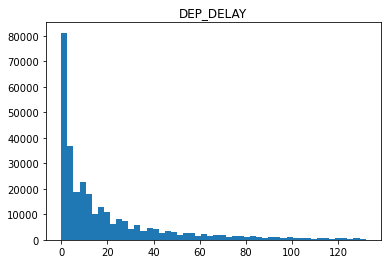

In [22]:
# flight_weather_df.hist(column='DEP_DELAY', bins =50, grid=False)

Most flights have none or minimal delays. So this distribution isn't surprising. The average flight is delayed by 9 minutes, with a fairly large standard deviation of 43 minutes. Looking at the 75th percentile, just 25% of flgiths had delays over 6 minutes.

Let's zoom in on those values.

In [23]:
# minimal = flight_weather_df.loc[flight_weather_df['DEP_DELAY'] < 15, 'DEP_DELAY']
# one_std = flight_weather_df.loc[flight_weather_df['DEP_DELAY'] < 30, 'DEP_DELAY']
# two_std = flight_weather_df.loc[flight_weather_df['DEP_DELAY'] < 60, 'DEP_DELAY']
# three_std = flight_weather_df.loc[flight_weather_df['DEP_DELAY'] < 90, 'DEP_DELAY']

# print(minimal.count())
# print(one_std.count()- minimal.count())
# print(two_std.count()-one_std.count())
# print(three_std.count()-two_std.count())

182875
50032
39508
16511


It looks like even when we look at the most extreme 25% of delays, the average delay here is still 48 minutes with a standard deviation of 76 minutes.  Over 75% of the data falls under a 13 minute delay.

We'll construct our buckets as such:

* Neglibile delay (No delay or 15 minutes or less)
* Mild (Delay between 15 and 30 minutes)
* Moderate (Delay between 30 minutes and hour)
* Serious (Delay over an hour)
* Major (Delay over 2 hours)

In [24]:
# # Create a function to engineer this feature

# def delay_group(value):
#     """
#     Funtion takes in int or float and returns category of delay
#     """
#     if value <= 15:
#         return 'neglibile'
#     if value > 15 and value <= 30:
#         return 'mild'
#     if value > 30 and value <= 60:
#         return 'moderate'
#     if value > 60:
#         return 'serious'
    
# flight_weather_df['delay_type'] = flight_weather_df['DEP_DELAY'].apply(delay_group)
# flight_weather_df['delay_type'].value_counts(normalize=True)

# flight_weather_df['holiday_name'] = flight_weather_df['holiday_name'].fillna('none')
# flight_weather_df['days-from-holiday'] = flight_weather_df['days-from-holiday'].replace({'null':'7plus'})

# # Write the above DF to a CSV so we don't have to re-run all the code above
# flight_weather_df.to_csv('data/weather_flight_data.csv')

In [2]:
flight_weather_df = pd.read_csv('data/weather_flight_data.csv')

### Brining it all together

In [3]:
y = flight_weather_df["delay_type"]
X = flight_weather_df.drop(["delay_type", "DEP_DELAY", 'da_NAME', 'pa_NAME'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [5]:
num_cols = ['AWND', 'PRCP', 'SNOW', 'TMAX', 'TMIN',
            'pa_AWND', 'pa_PRCP', 'pa_SNOW', 'pa_TMAX', 'pa_TMIN',
           'da_AWND', 'da_PRCP', 'da_SNOW', 'da_TMAX', 'da_TMIN',
           'leg-1-distance', 'leg-2-distance', 'avg-flights-at-takeoff', 'avg-flights-before-takeoff', 'DAY_OF_MONTH']

cat_cols = ['take-off-rounded-hour', 'DAY_OF_WEEK', 'OP_CARRIER', 'ORIGIN',
            'DEST', 'prev_airport', 'holiday', 'month-day', 'op-airline-airport',
            'days-from-holiday', 'holiday_name', 'MONTH']

In [6]:
X_train_num = X_train[num_cols].copy()
X_train_cat = X_train[cat_cols].copy()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train_num.index, columns=X_train_num.columns)

In [8]:
X_train_cat = X_train_cat.applymap(str)

In [9]:
cols = X_train_cat.columns
X_train_ohe = pd.get_dummies(X_train_cat,prefix=cols, drop_first=False)

In [10]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()
labels = binarizer.fit_transform(y_train)

In [11]:
X_train_preprocessed = pd.concat([X_train_ohe, X_train_scaled], axis=1)

In [12]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

class_weights_gd = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                   
                                    )
class_weights_gd = dict(zip(np.unique(y_train), class_weights_gd))
class_weights_gd

{'mild': 1.5816369566439858,
 'moderate': 1.9727336489566896,
 'neglibile': 0.39948938648259014,
 'serious': 2.796127845710309}

In [13]:
class_weights_dl = {0: 1.5816369566439858,
                1: 1.9727336489566896,
                2: 00.39948938648259014,
                3: 2.796127845710309}

## Modeling

In [14]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
precision_recall_fscore_support, f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_validate, cross_val_predict, cross_val_score

In [15]:
def model_performance(pipe, X, y):
    
    scoring = ['accuracy','precision_micro', 'recall_micro', 'f1_micro']
    cv = cross_validate(pipe, X, y, return_train_score=True, scoring=scoring)
    
    # Printing Train & CV Scores
    
    print('Training Accuracy', round(cv['train_accuracy'].mean(),3))
    print('---')
    print('Cross Val Accuracy', round(cv['test_accuracy'].mean(),3))
    print('---')
    print('Training Precision:', round(cv['train_precision_micro'].mean(),3))
    print('Cross Val Precision:', round(cv['test_precision_micro'].mean(),3))
    print('---')
    print('Training Recall:', round(cv['train_recall_micro'].mean(),3))
    print('Cross Val Recall:', round(cv['test_recall_micro'].mean(),3))
    print('---')
    print('Training F1:', round(cv['train_f1_micro'].mean(),3))
    print('Cross Val F1:', round(cv['test_f1_micro'].mean(),3))
   
    # Plotting a confusion matrix
    plot_confusion_matrix(pipe, X, y, normalize='true')

C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Training Accuracy 0.407
---
Cross Val Accuracy 0.393
---
Training Precision: 0.407
Cross Val Precision: 0.393
---
Training Recall: 0.407
Cross Val Recall: 0.393
---
Training F1: 0.407
Cross Val F1: 0.393


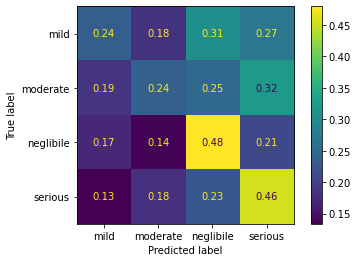

In [16]:
lr_pipe = Pipeline(steps=[
    ('lr', LogisticRegression(class_weight=class_weights_gd, random_state=123))
])

lr_pipe.fit(X_train_preprocessed, y_train)

model_performance(lr_pipe, X_train_preprocessed, y_train)

Training Accuracy 0.407
---
Cross Val Accuracy 0.392
---
Training Precision: 0.407
Cross Val Precision: 0.392
---
Training Recall: 0.407
Cross Val Recall: 0.392
---
Training F1: 0.407
Cross Val F1: 0.392


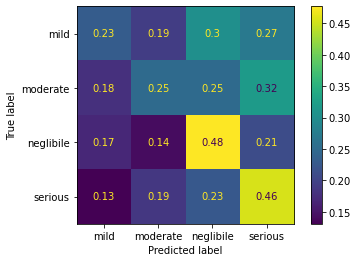

In [50]:
# lr_pipe2 = Pipeline(steps=[
#     ('lr', LogisticRegression(class_weight=class_weights_gd,
#                               max_iter=1000,
#                               random_state=123))
# ])

# lr_pipe2.fit(X_train_preprocessed, y_train)

# model_performance(lr_pipe2, X_train_preprocessed, y_train)

In [18]:
lr_param_grid = {
    'lr__solver': ['saga', 'sag', 'newton-cg'] # Trying different solvers
}

lr_gridsearch = GridSearchCV(estimator=lr_pipe, 
                          param_grid=lr_param_grid,
                          scoring='f1_micro',
                          verbose=3)

# Fit the training data
lr_gridsearch.fit(X_train_preprocessed, y_train)

# Show the best parameters
print(lr_gridsearch.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...................lr__solver=saga;, score=0.397 total time= 5.1min


C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...................lr__solver=saga;, score=0.392 total time= 5.1min


C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...................lr__solver=saga;, score=0.392 total time= 5.1min


C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...................lr__solver=saga;, score=0.391 total time= 5.1min


C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...................lr__solver=saga;, score=0.393 total time= 5.1min


C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....................lr__solver=sag;, score=0.396 total time= 4.1min


C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....................lr__solver=sag;, score=0.391 total time= 4.1min


C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....................lr__solver=sag;, score=0.392 total time= 4.1min


C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....................lr__solver=sag;, score=0.390 total time= 4.1min


C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....................lr__solver=sag;, score=0.392 total time= 4.1min
[CV 1/5] END ..............lr__solver=newton-cg;, score=0.396 total time=15.8min
[CV 2/5] END ..............lr__solver=newton-cg;, score=0.391 total time=16.5min
[CV 3/5] END ..............lr__solver=newton-cg;, score=0.391 total time=16.8min
[CV 4/5] END ..............lr__solver=newton-cg;, score=0.389 total time=17.0min
[CV 5/5] END ..............lr__solver=newton-cg;, score=0.391 total time=17.1min
{'lr__solver': 'saga'}


C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Deep Learning

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense

# model_1 = Sequential()
# model_1.add(Dense(1870, activation='relu', input_dim=958))
# model_1.add(Dense(935, activation='relu'))
# model_1.add(Dense(300, activation='relu'))
# model_1.add(Dense(150, activation='relu'))
# model_1.add(Dense(75, activation='relu'))
# model_1.add(Dense(4, activation='softmax'))

# model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
# results_1 = model_1.fit(X_train_preprocessed, labels, class_weight=class_weights_dl, epochs=25, batch_size=32, validation_split=0.2)

In [ ]:
# from keras import models
# from keras import layers

# model_2 = Sequential()
# model_2.add(Dense(1870, activation='relu', input_dim=958))
# model_2.add(Dense(935, activation='relu'))
# model_2.add(Dense(300, activation='relu'))
# model_2.add(layers.Dropout(0.3))
# model_2.add(Dense(150, activation='relu'))
# model_2.add(Dense(75, activation='relu'))
# model_2.add(layers.Dropout(0.3))
# model_2.add(Dense(4, activation='softmax'))

# model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# from keras.callbacks import EarlyStopping, ModelCheckpoint

# # Define the callbacks
# early_stopping = [EarlyStopping(monitor='val_acc', min_delta=0.01, patience=20), 
#                   ModelCheckpoint(filepath='models/best_model.h5', monitor='val_acc', save_best_only=True)]

# model_2_hist = model_2.fit(X_train_preprocessed,
#                            labels,
#                            class_weight=class_weights_dl,
#                            epochs=150,
#                            batch_size=32,
#                            validation_split=0.2,
#                            callbacks=early_stopping)

In [ ]:
# from keras import regularizers

# model_3 = Sequential()
# model_3.add(Dense(1870, kernel_regularizer=regularizers.l1(0.005), activation='relu', input_dim=935))
# model_3.add(Dense(935, activation='relu'))
# model_3.add(Dense(300, activation='relu'))
# model_3.add(layers.Dropout(0.3))
# model_3.add(Dense(150, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
# model_3.add(Dense(75, activation='relu'))
# model_3.add(layers.Dropout(0.3))
# model_3.add(Dense(4, activation='softmax'))

# model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# early_stopping_reg = [EarlyStopping(monitor='val_acc', min_delta=0.001, patience=30), 
#                   ModelCheckpoint(filepath='models/best_model_reg.h5', monitor='val_acc', save_best_only=True)]

In [ ]:
# model_3_hist = model_3.fit(X_train_preprocessed,
#                            labels,
#                            class_weight=class_weights_dl,
#                            epochs=250,
#                            batch_size=32,
#                            validation_split=0.2,
#                            callbacks=early_stopping_reg)

In [ ]:
# # Optimized XGBoost Classifier
# xgb_pipe = Pipeline(steps=[
#     ('xg', XGBClassifier())
# ])

# xgb_pipe.fit(X_train_preprocessed, y_train)

# model_performance(xgb_pipe, X_train_preprocessed, y_train)

In [ ]:
# # Searching for the best hyperparameters
# xgb_grid = {
#     'xg__learning_rate': [0.05, 0.10, 0.15],
#     'xg__max_depth': [3, 6, 12, 15],
#     'xg__min_child_weight': [1, 3, 5, 7],
#     'xg__subsample': [0.5, 0.7]
# }

# args = {'sample_weight': sample_weights}

# xgb_pipe = Pipeline(steps=[
#     ('xg', XGBClassifier(**args))
# ])

# xgb_gridsearch = GridSearchCV(estimator=xgb_pipe, 
#                           param_grid=xgb_grid,
#                           scoring='recall',
#                           verbose=3,
#                           error_score="raise")

# # Fit the training data
# xgb_gridsearch.fit(X_train_preprocessed, y_train)

# # Print the recall on test set and best params
# print(xgb_gridsearch.best_params_)